In [1]:
using StatsBase, Plots, Plots.PlotMeasures, StatsPlots, LaTeXStrings

In [2]:
# Numbers transcribed from `Suppressing quantum errors by scaling a surface code logical qubit` by Google Quantum AI (2023)
# Single qubit gate error in percentages
single_qubit_errors_percentage = [0.07; 0.08; 0.03; 0.11; 0.04; 0.11; 0.06; 0.04; 0.06; 0.07; 0.06; 0.11; 0.06; 0.08; 0.08; 0.07; 0.15; 0.06; 0.08; 0.09; 0.07; 0.08; 0.06; 0.06; 0.11; 0.07; 0.04; 0.08; 0.07; 0.04; 0.09; 0.08; 0.10; 0.06; 0.07; 0.07; 0.05; 0.05; 0.09; 0.03; 0.05; 0.09; 0.09; 0.08; 0.07; 0.05; 0.08; 0.08; 0.07]
# CZ gate error in percentages
CZ_errors_percentage = [0.35; 0.31; 0.67; 0.50; 0.82; 0.52; 0.77; 0.41; 0.53; 0.46; 0.30; 0.52; 0.60; 0.55; 0.69; 0.22; 0.53; 0.26; 0.60; 0.79; 0.46; 0.47; 0.33; 0.41; 0.31; 0.38; 0.25; 0.39; 0.08; 0.42; 0.58; 0.33; 0.27; 0.39; 0.58; 1.19; 0.21; 0.49; 0.35; 0.52; 0.35; 0.47; 0.53; 0.44; 0.52; 0.59; 0.34; 0.48; 0.39; 0.50; 0.38; 0.59; 0.42; 0.57; 1.18; 0.72; 0.45; 0.53; 0.71; 0.36; 1.25; 0.36; 0.45; 0.42; 0.49; 0.55; 0.22; 0.48; 0.66; 0.31; 0.46; 0.26; 0.76; 0.31; 0.51; 0.35; 0.42; 0.41; 0.43; 0.33]
# Measurement error in percentages
readout_errors_percentage = [2.0; 4.0; 1.1; 2.2; 1.1; 1.6; 2.1; 1.3; 1.5; 1.4; 2.1; 0.9; 1.7; 2.5; 1.6; 2.8; 2.3; 1.8; 2.2; 3.0; 2.4; 4.2; 1.6; 2.2; 2.0; 1.6; 1.4; 2.3; 2.6; 1.2; 1.4; 2.4; 2.0; 1.8; 1.3; 1.6; 1.2; 2.0; 3.1; 1.4; 1.4; 1.7; 1.8; 2.2; 1.7; 1.7; 2.5; 1.5; 1.3]
# Mean errors and the corresponding numbers translated into my convention
single_qubit_mean_error = mean(single_qubit_errors_percentage)
two_qubit_mean_error = mean(CZ_errors_percentage)
measurement_mean_error = mean(readout_errors_percentage)
println("The mean single-qubit gate error rate is $(round(single_qubit_mean_error, digits=3))%.
The mean two-qubit gate error rate is $(round(two_qubit_mean_error, digits=3))%.
The mean measurement error rate is $(round(measurement_mean_error, digits=3))%.")

The mean single-qubit gate error rate is 0.072%.
The mean two-qubit gate error rate is 0.484%.
The mean measurement error rate is 1.933%.


In [3]:
# We therefore choose the following error rates
r_1 = 0.00075
r_2 = 0.005
r_m = 0.02
println("We therefore pick similar error rates to parameterise our noise model.")

We therefore pick similar error rates to parameterise our noise model.


The mean of the logarithm is -8.383, and the standard deviation is 0.3332.


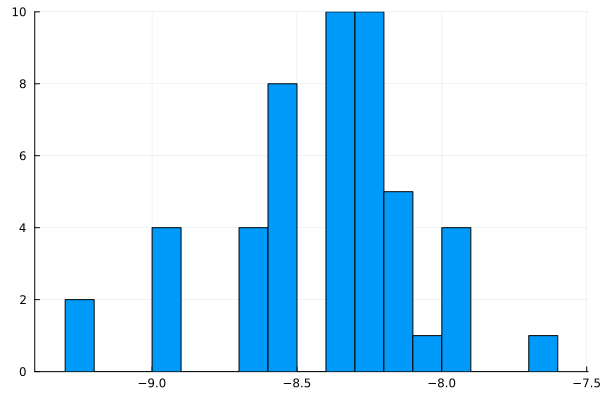

In [4]:
println("The mean of the logarithm is $(round(mean(log.(single_qubit_errors_percentage/(100*3))), sigdigits = 4)), and the standard deviation is $(round(std(log.(single_qubit_errors_percentage/(100*3))), sigdigits = 4)).")
histogram(log.(single_qubit_errors_percentage/(100*3)), bins = 15, legend = false)

The mean of the logarithm is -8.118, and the standard deviation is 0.4105.


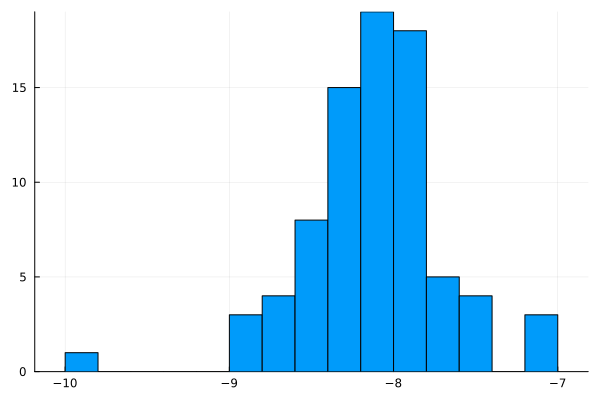

In [5]:
println("The mean of the logarithm is $(round(mean(log.(CZ_errors_percentage/(100*15))), sigdigits = 4)), and the standard deviation is $(round(std(log.(CZ_errors_percentage/(100*15))), sigdigits = 4)).")
histogram(log.(CZ_errors_percentage/(100*15)), bins = 15, legend = false)

The mean of the logarithm is -4.0, and the standard deviation is 0.3246.


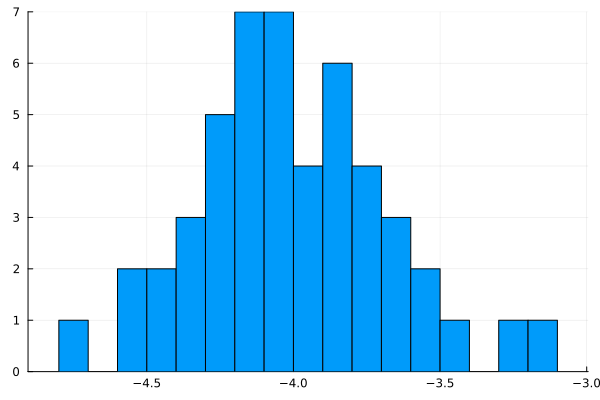

In [6]:
println("The mean of the logarithm is $(round(mean(log.(readout_errors_percentage/(100))), sigdigits = 4)), and the standard deviation is $(round(std(log.(readout_errors_percentage/(100))), sigdigits = 4)).")
histogram(log.(readout_errors_percentage/100), bins = 15, legend = false)

In [7]:
# Standard deviation
sigma_sq_tot = log(10/9)
trials = 10^6
println("These distributions are not inconsistent with log-normally distributed error probabilities.
Their standard deviations are not inconsistent with the value $(round(sqrt(sigma_sq_tot), sigdigits=6)).")

These distributions are not inconsistent with log-normally distributed error probabilities.
Their standard deviations are not inconsistent with the value 0.324593.


In [8]:
# Test measurements in the log-normal Pauli noise model
mu_meas = log(r_m) - sigma_sq_tot / 2
meas_list = [exp(randn() * sqrt(sigma_sq_tot) + mu_meas) for _ in 1:trials]
println("The simulated measurement errors have mean $(round(mean(meas_list), sigdigits=6)), compared the target $(r_m).
The underlying normal variables have variance $(round(var(log.(meas_list)), sigdigits=6)), compared the target $(round(sigma_sq_tot, sigdigits=6)).")

The simulated measurement errors have mean 0.0200045, compared the target 0.02.
The underlying normal variables have variance 0.105301, compared the target 0.105361.


In [9]:
# Test single-qubit gates in the log-normal Pauli noise model
b_1 = 1
sigma_sq_1 = log(1+(4^b_1-1)*(exp(sigma_sq_tot)-1))
@assert sigma_sq_1 ≈ log(4/3)
mu_1 = log(r_1/(4^b_1-1)) - sigma_sq_1/2
one_list = [sum(exp.(randn(4^b_1-1) .* sqrt(sigma_sq_1) .+ mu_1)) for _ in 1:trials]
println("The simulated single-qubit gate errors have mean $(round(mean(one_list), sigdigits=6)), compared the target $(r_1).
The underlying normal variables have variance $(round(var(log.(one_list)), sigdigits=6)), compared the target $(round(sigma_sq_tot, sigdigits=6)).")

The simulated single-qubit gate errors have mean 0.000749879, compared the target 0.00075.
The underlying normal variables have variance 0.103821, compared the target 0.105361.


In [10]:
# Test two-qubit gates in the log-normal Pauli noise model
b_2 = 2
sigma_sq_2 = log(1+(4^b_2-1)*(exp(sigma_sq_tot)-1))
@assert sigma_sq_2 ≈ log(8/3)
mu_2 = log(r_2/(4^b_2-1)) - sigma_sq_2/2
two_list = [sum(exp.(randn(4^b_2-1) .* sqrt(sigma_sq_2) .+ mu_2)) for _ in 1:trials]
println("The simulated two-qubit gate errors have mean $(round(mean(two_list), sigdigits=6)), compared the target $(r_2).
The underlying normal variables have variance $(round(var(log.(two_list)), sigdigits=6)), compared the target $(round(sigma_sq_tot, sigdigits=6)).")

The simulated two-qubit gate errors have mean 0.00499975, compared the target 0.005.
The underlying normal variables have variance 0.0971915, compared the target 0.105361.
